# Modeling Cascading Behaviour
The Given task is to see that how an action/behaviour spreads over an existing behaviour
So basically the task is something like
* A network is given in which every node have some behaviour (let's say initial_behaviour) and we want to check whether an external behaviour let's say (new_behaviour) is possible or not to spread in our network by converting the nodes which are already having initial_behaviour
* i'm are doing this experiment by considering that few nodes of the graph are somehow changed their initial_behaviour to new_behaviour (but actually I'm coding for that, that we'll see below later).
* Along with changing the behaviours of few nodes I'm also providing some PAYOFFs for both the initial_behaviour and new_behaviour as a reason to spread the new_behaviour in the network

### Requirements/Instruction to execute this file
* Install Python (I've used Python3.7) using the command
```
sudo apt install python3.7
```
* Install Jupyter Nodebook using the command
```
pip install notebook
```
* Install Networkx package using the command
```
pip install networkx
```
**Run the cells of this notebook using Shift + Enter**



**-----------------------------------------------------------------------------------------------------------------------------------------**

### I've implemented this spreading of by two ways 
* First, I've taken the Network graph given in the Book Network Crowd and Market in Ch-19.2, Fig 19.2  
* This Network contains 17 nodes labelled from 1 to 17.
* You can also use any random graph to experiment on, to do so you've to _UNCOMMENT_ the respective code and pass the argument as number of nodes and probability of adding the edge 
* Here I'm taking two PAYOFFs values for two different nodes
* These two nodes are actually pair of all possible seed nodes
* And Checking using the taken PAYOFFs for each possible pairs of different nodes that which pair produces COMPLETE CASCADE and which remains INCOMPLETE along with size of cascade that is produced after 100 iteration
```
Required Input for this model is
 ENTER number of TEST cases to test for different PAYOFFs
 ENTER the PAYOFFs initial behaviour and new behaviour (one by one) which is adopted by seed nodes choosen through loop
```
### If You are using the graph from the Book (Ch-19.2 Fig 19.4)
* If you give input payoffs as 2 and 3
```
Check Output for pair 7 and 8, we can see we are getting cascade size of 7 as give in the book
```
We can Say the above Payoff are below the threshold Payoff for initial seed node 7 and 8

* If you give iput Payoff as 2 and 4 
```
Check Output we'll get mostly complete Cascade
```
So here we can say this value is above the threshold as we'll get Complete Cascade for seed pair 7 and 8


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

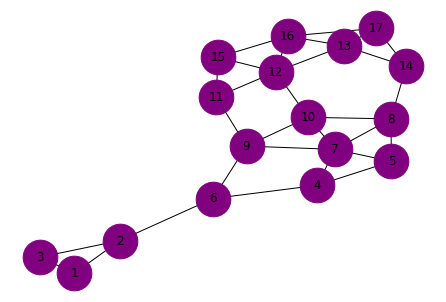

Enter Number of Test cases: 1
Enter PAYOFF for Initial bahaviour: 2
Enter PAYOFF for New bahaviour: 4
1 2 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 3 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 6 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 4 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 9 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 5 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 7 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 8 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 10 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 14 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
1 11 :

For the above choosen seed the cascade is INCOMPLETE ( with cascading size of:  7 )
12 13 :
For the above choosen seed the cascade is INCOMPLETE ( with cascading size of:  7 )
12 17 :
For the above choosen seed the cascade is INCOMPLETE ( with cascading size of:  7 )
15 2 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 3 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 6 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 4 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 9 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 5 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 7 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 8 :
For the above choosen seed the cascade is COMPLETE ( with cascading size of:  17 )
15 16 :
For 

In [41]:

#g = nx.erdos_renyi_graph(20, 0.5)

#################### IF YOU WANT TO TEST ON A RANDOM GRAPH ###################
########### UNCOMMENT ABOVE COMMAND and COMMENT BELOW TWO LINES OF GRAPH WHICH IS FROM THE BOOK ############


#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
g = nx.Graph()               # generates empty graph
g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])

nx.draw(g,node_size=1200,node_color= 'purple', with_labels=True)  ## PLOTS the above choosen graph 
plt.show()

t = int(input('Enter Number of Test cases: '))                    ## Enter the number of test cases

while(t):
    
    Input_payof_ini = int(input('Enter PAYOFF for Initial bahaviour: '))        ## INPUTS for PAYOFFs
    Input_payof_new = int(input('Enter PAYOFF for New bahaviour: '))

    def cal_adopted_initial_beahaviour(each, type_of_behaviour, g):   ## CALCULATES the number of neighbours which have initial behaviour for each nodes
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']=='initial_behaviour':
                num=num+1
        return num
    
    def cal_adopted_new_beahaviour(each, type_of_behaviour, g):      ## CALCULATES the number of neighbours which have new behaviour for each nodes 
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']==type_of_behaviour:
                num=num+1
        return num

    def calculate_adoptation(g):
        dict1= {}                                               ## Create empty dictionary to store the behaviours of nodes
        #Payoff(A) =a=4
        #Payoff(B) =b=3
        #a=5
        #b=2

       # a = int(input('Enter payoff for new bahaviour: '))
        #b = int(input('Enter payoff for initial bahaviour: '))
        
        for each in g.nodes():
           # for each1 in g.neighbors(each):
            if g.nodes[each]['behaviour']=='initial_behaviour':     ## Condition to calculate only for those nodes which have initial behaviour          
                num_new_behaviour = cal_adopted_new_beahaviour(each, 'new_behaviour', g)
                num_initial_beahaviour = cal_adopted_initial_beahaviour(each, 'initial_behaviour', g)       
                payoff_A=Input_payof_new*num_new_behaviour          ## Calulating total Payoffs for new behaviour for a node
                payoff_B=Input_payof_ini*num_initial_beahaviour     ## Calulating total Payoffs for initial behaviour for a node
                if payoff_A >= payoff_B:
                    dict1[each]='new_behaviour'
                else:
                    dict1[each]= 'initial_behaviour'
            else:
                dict1[each]='new_behaviour'
        return dict1
        
    def check_new_behaviour(type_of_behaviour, g):                  
        count_new_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:     ## check whether every nodes have new behaviour
                count_new_behav=0
                break
        return count_new_behav

    def check_initial_behaviour(type_of_behaviour, g):
        count_initial_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:   ## check whether every nodes have initial behaviour
                count_initial_behav=0
                break
        return count_initial_behav    

    def get_final_result(g, count):                                 ## Checks for final result if Complete cascade is formed or FULLY incomplete is formed or for balanced one it'll check for 100 times 
        count_new=check_new_behaviour('new_behaviour', g)
        count_initial=check_initial_behaviour('initial_behaviour',g)   
        if count_new==1 or count_initial==1 or count>=100:
            return 1
        else:
            return 0

        
    for seed_node1 in g.nodes():                   ## Chooses first seed 
        for seed_node2 in g.nodes():               ## Chooses second seed
            if seed_node1<seed_node2:
                print(seed_node1,seed_node2, ':')
                infected_seed = []
                infected_seed.append(seed_node1)     ## Appending the choosen seed in an infected list to check the cascading behaviour for rest of nodes in the network
                infected_seed.append(seed_node2)
            
            
                external_behaviour = "new_behaviour"
                bahaviour_1 = "initial_behaviour"
                for each in g.nodes():                   ## Giving the initial behaviour to each node of the network
                    g.nodes[each]['behaviour'] = bahaviour_1
    

                for each in infected_seed:              ## Changing the behaviour of the nodes that are in the infected list
                    g.nodes[each]['behaviour'] = external_behaviour 
                
                temp =0
                count =0
                while(1):                              ## To check which behaviour adopted in the network if fully complete or fully incomplete didn't resulted than loop will run upto 100 loop
                    temp = get_final_result(g, count)
                    if temp==1:
                        break
                    count = count+1
                    behaviour_di  = calculate_adoptation(g)
                    for each in behaviour_di:
                        g.nodes[each]['behaviour']= behaviour_di[each]

                val =check_new_behaviour('new_behaviour', g)
                if val==1:
                    print('For the above choosen seed the cascade is COMPLETE ( with cascading size of: ', len(g),')')
                else:
                    count =0
                    for i in g.nodes():
                        if(g.nodes[i]['behaviour'] == "new_behaviour"):
                            count = count +1
                    print('For the above choosen seed the cascade is INCOMPLETE ( with cascading size of: ', count,')')
    print('\n\n')
    t = t-1

## ----------------------------------------------------------------------------------------------------------

#### Test the behaviour using this way 
* Here, I've taken the random graph and (Network graph given in the Book Network Crowd and Market in Ch-19.2 which is commented in the code)  
* This Random Network contains 20 nodes labelled from 1 to 20 in which edges are generated randomly with probability of 0.5 (YOU CAN CHANGE THE PARAMETERS By passing anyother argument).
* You can also use Network graph of the book to experiment on, to do so you've to _UNCOMMENT_ the respective code 
* Here I'm taking two PAYOFFs values for two different seed nodes
* After that we will input two seed nodes with which we want to test the spreading behaviour
* We are Checking using the taken PAYOFFs for the taken pair of different nodes that whether it produces COMPLETE CASCADE or remains INCOMPLETE along with size of cascade that is produced after 100 iteration

```
Required Input for this model is
 ENTER number of TEST cases to test for different PAYOFFs and different seed nodes of your choice
 ENTER the PAYOFFs for initial behaviour and new behaviour 
 ENTER the NUMBER of nodes that you want to infect with new behaviour
 ENTER the seed value/node Numbers to which you are infecting in the starting
```
**------------------------------------------------------------------------------------------------------------------------------------------------------**
#### I was getting some error due to some packaege while reading the network file, So Ive choosen the Random graph 
**Due to RANDOM GRAPH, user is requested to Enter test cases. Since if you run it again and again the graph will change. So take a good number for test case so that you can check by changing for various SEED NODES and PAYOFFs on the same graph**

**------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# g = nx.Graph()

# g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])
# nx.draw(g,node_size=1200, with_labels=True)
# plt.show()


In [3]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [ ]:
#len(g)
#g.nodes[1]
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

Choosen network is: 


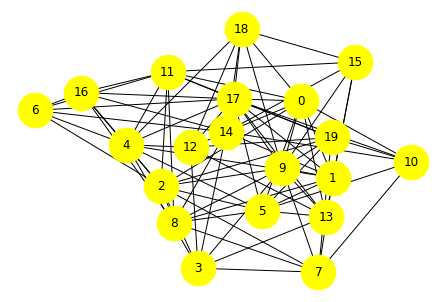

Enter Number of Test cases: 2
Enter PAYOFF for Initial bahaviour: 2
Enter PAYOFF for New bahaviour: 3
Enter number of inital seeds that you want to give: 3
Enter seed value: 2
Enter seed value: 3
Enter seed value: 5
Initial seed input given by the user is:  [2, 3, 5]
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  3 )


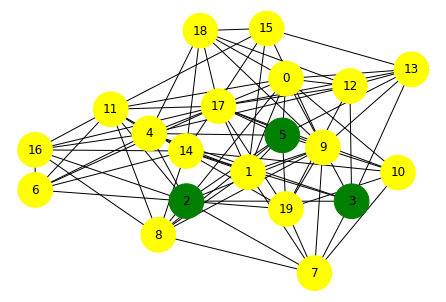

Enter PAYOFF for Initial bahaviour: 1
Enter PAYOFF for New bahaviour: 10
Enter number of inital seeds that you want to give: 3
Enter seed value: 1
Enter seed value: 3
Enter seed value: 4
Initial seed input given by the user is:  [1, 3, 4]
For the provided initial seed input for new bahaviour the cascade is COMPLETE ( with cascading size of:  20 )


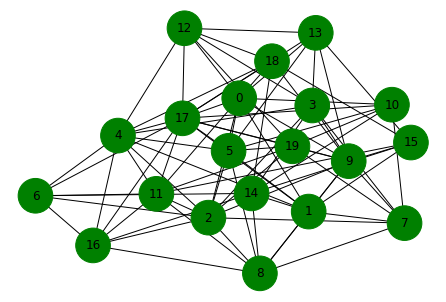

In [40]:


# g = nx.Graph()
# g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
# nx.draw(g,node_size=1200, with_labels=True)
# plt.show()
#################### IF YOU WANT TO TEST ON A GRAPH WHICH IS FROM THE BOOK ###################
########### UNCOMMENT ABOVE COMMAND and COMMENT BELOW LINE OF RANDOM GRAPH #######
g = nx.erdos_renyi_graph(20, 0.5)

print('Choosen network is: ')
nx.draw(g,node_color= 'yellow' , node_size=1200,with_labels=True)  ## PLOTS the above choosen graph 
plt.show()
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

t = int(input('Enter Number of Test cases: '))             ## Enter the number of test cases

while(t):
    
    Input_payof_ini = int(input('Enter PAYOFF for Initial bahaviour: '))        ## INPUTS for PAYOFFs
    Input_payof_new = int(input('Enter PAYOFF for New bahaviour: '))

    def cal_adopted_initial_beahaviour(each, type_of_behaviour, g):          ## CALCULATES the number of neighbours which have initial behaviour for each nodes
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']=='initial_behaviour':
                num=num+1
        return num
    
    def cal_adopted_new_beahaviour(each, type_of_behaviour, g):            ## CALCULATES the number of neighbours which have new behaviour for each nodes
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']==type_of_behaviour:
                num=num+1
        return num

    def calculate_adoptation(g):
        dict1= {}                                                      ## Create empty dictionary to store the behaviours of nodes
        #Payoff(Input_payof_new) =a=4
        #Payoff(Input_payof_ini) =b=3
        #Input_payof_new=5
        #Input_payof_ini=2
       #Input_payof_new = int(input('Enter payoff for new bahaviour: '))
        #Input_payof_ini = int(input('Enter payoff for initial bahaviour: '))
        for each in g.nodes():
           # for each1 in g.neighbors(each):
            if g.nodes[each]['behaviour']=='initial_behaviour':     ## Condition to calculate only for those nodes which have initial behaviour          
                num_new_behaviour = cal_adopted_new_beahaviour(each, 'new_behaviour', g)
                num_initial_beahaviour = cal_adopted_initial_beahaviour(each, 'initial_behaviour', g)       
                payoff_A=Input_payof_new*num_new_behaviour          ## Calulating total Payoffs for new behaviour for a node
                payoff_B=Input_payof_ini*num_initial_beahaviour     ## Calulating total Payoffs for initial behaviour for a node
                if payoff_A >= payoff_B:
                    dict1[each]='new_behaviour'
                else:
                    dict1[each]= 'initial_behaviour'
            else:
                dict1[each]='new_behaviour'
        return dict1
        
    def check_new_behaviour(type_of_behaviour, g):                  ## check whether every nodes have new behaviour
        count_new_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_new_behav=0
                break
        return count_new_behav

    def check_initial_behaviour(type_of_behaviour, g):                ## check whether every nodes have initial behaviour
        count_initial_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_initial_behav=0
                break
        return count_initial_behav    

    def get_final_result(g, count):                      ## Checks for final result if Complete cascade is formed or FULLY incomplete is formed or for balanced one it'll check for 100 times 
        count_new=check_new_behaviour('new_behaviour', g)
        count_initial=check_initial_behaviour('initial_behaviour',g)
        if count_new==1 or count_initial==1 or count>=100:
            return 1
        else:
            return 0

    def col_fun(g):                                     ## It colours the infected seeds with green colour and seeds with initial behaviour with yellow colour
        infected_seed=[]
        for each in g.nodes():
            if g.nodes[each]['behaviour']=='initial_behaviour':
                infected_seed.append('yellow')
            else:
                infected_seed.append('green')
        return infected_seed
    

    external_behaviour = "new_behaviour"
    bahaviour_1 = "initial_behaviour"
    for each in g.nodes():
        g.nodes[each]['behaviour'] = bahaviour_1             ## Giving the initial behaviour to each node of the network       
    
    #n1 = input()
    #n2 = input()
    #infected_seed = [2,5,8]
    infected_seed = []                                    ## Create an empty list for infected seed list
    n= int(input("Enter number of inital seeds that you want to give: "))      ## ENter the number of initial seeds that you're infecting

    for i in range(0,n):
        seed_val = int(input('Enter seed value: '))
        infected_seed.append(seed_val)                  ## Appending the seeds with new behaviour in an list
    
    print('Initial seed input given by the user is: ', infected_seed)        ## Prints the inital seed list
    
    
    

    for each in infected_seed:                           ## IT converts the behaviour of all those nodes which are in infectyed seed list
        g.nodes[each]['behaviour'] = external_behaviour 

    #a = input("payoff for A: ")
    #b= input("payoff for B: ")
    temp =0
    count =0
    while(1):                                          ## To check which behaviour adopted in the network if fully complete or fully incomplete didn't resulted than loop will run upto 100 loop
        temp = get_final_result(g, count)
        if temp==1:
            break
        count = count+1
        behaviour_di  = calculate_adoptation(g)
        for each in behaviour_di:
            g.nodes[each]['behaviour']= behaviour_di[each]
        colors = col_fun(g)

    val =check_new_behaviour('new_behaviour', g)
    if val==1:
        print('For the provided initial seed input for new bahaviour the cascade is COMPLETE ( with cascading size of: ', len(g),')')
    else:
        count = 0
        for i in g.nodes():
            if(g.nodes[i]['behaviour'] == "new_behaviour"):
                count = count +1
        print('For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of: ', count,')')
    nx.draw(g,node_color= colors , node_size=1200,with_labels=True)
    plt.show()
    t=t-1

